In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#raw data
cpi_list = ''' 
1952-01-01, 31.2, 
1952-02-01, 30.7, 
1952-03-01, 30.7, 
1952-04-01, 30.8, 
1952-05-01, 30.8, 
1952-06-01, 30.6, 
1952-07-01, 30.8, 
1952-08-01, 30.9, 
1952-09-01, 30.8, 
1952-10-01, 30.8, 
1952-11-01, 31.2, 
1952-12-01, 30.9, 
1953-01-01, 30.6, 
1953-02-01, 30.2, 
1953-03-01, 30.3, 
1953-04-01, 30.1, 
1953-05-01, 30.1, 
1953-06-01, 30.4, 
1953-07-01, 30.1, 
1953-08-01, 30.3, 
1953-09-01, 30.4, 
1953-10-01, 30.4, 
1953-11-01, 30.2, 
1953-12-01, 30.3, 
1954-01-01, 30.5, 
1954-02-01, 30.4, 
1954-03-01, 30.3, 
1954-04-01, 30.3, 
1954-05-01, 30.4, 
1954-06-01, 30.2, 
1954-07-01, 30.2, 
1954-08-01, 30.1, 
1954-09-01, 29.8, 
1954-10-01, 29.8, 
1954-11-01, 29.9, 
1954-12-01, 29.6, 
1955-01-01, 29.6, 
1955-02-01, 29.8, 
1955-03-01, 29.8, 
1955-04-01, 29.8, 
1955-05-01, 29.6, 
1955-06-01, 29.4, 
1955-07-01, 29.4, 
1955-08-01, 29.3, 
1955-09-01, 29.5, 
1955-10-01, 29.4, 
1955-11-01, 29.3, 
1955-12-01, 29.3, 
1956-01-01, 29.1, 
1956-02-01, 29.1, 
1956-03-01, 29.1, 
1956-04-01, 29.2, 
1956-05-01, 29.4, 
1956-06-01, 29.9, 
1956-07-01, 30.1, 
1956-08-01, 29.9, 
1956-09-01, 29.9, 
1956-10-01, 30, 
1956-11-01, 30.1, 
1956-12-01, 30.1, 
1957-01-01, 30.1, 
1957-02-01, 30.4, 
1957-03-01, 30.2, 
1957-04-01, 30.3, 
1957-05-01, 30.4, 
1957-06-01, 30.6, 
1957-07-01, 30.8, 
1957-08-01, 31.2, 
1957-09-01, 30.9, 
1957-10-01, 30.8, 
1957-11-01, 30.8, 
1957-12-01, 30.9, 
1958-01-01, 31.6, 
1958-02-01, 31.8, 
1958-03-01, 32.4, 
1958-04-01, 32.5, 
1958-05-01, 32.4, 
1958-06-01, 32.2, 
1958-07-01, 32, 
1958-08-01, 32, 
1958-09-01, 31.8, 
1958-10-01, 31.7, 
1958-11-01, 31.8, 
1958-12-01, 31.6, 
1959-01-01, 31.7, 
1959-02-01, 31.4, 
1959-03-01, 31.2, 
1959-04-01, 31.1, 
1959-05-01, 31, 
1959-06-01, 31.2, 
1959-07-01, 31.2, 
1959-08-01, 31.1, 
1959-09-01, 31.1, 
1959-10-01, 31.2, 
1959-11-01, 31.1, 
1959-12-01, 31.1, 
1960-01-01, 31, 
1960-02-01, 30.9, 
1960-03-01, 31, 
1960-04-01, 31.4, 
1960-05-01, 31.5, 
1960-06-01, 31.5, 
1960-07-01, 31.4, 
1960-08-01, 31.5, 
1960-09-01, 31.5, 
1960-10-01, 31.8, 
1960-11-01, 32, 
1960-12-01, 32.1, 
1961-01-01, 32, 
1961-02-01, 32, 
1961-03-01, 32, 
1961-04-01, 31.9, 
1961-05-01, 31.8, 
1961-06-01, 31.6, 
1961-07-01, 31.7, 
1961-08-01, 31.7, 
1961-09-01, 31.7, 
1961-10-01, 31.7, 
1961-11-01, 31.5, 
1961-12-01, 31.6, 
1962-01-01, 31.7, 
1962-02-01, 31.9, 
1962-03-01, 32, 
1962-04-01, 32, 
1962-05-01, 32, 
1962-06-01, 31.9, 
1962-07-01, 31.7, 
1962-08-01, 31.8, 
1962-09-01, 32.3, 
1962-10-01, 32.2, 
1962-11-01, 32.2, 
1962-12-01, 32, 
1963-01-01, 32.4, 
1963-02-01, 32.4, 
1963-03-01, 32.3, 
1963-04-01, 32.2, 
1963-05-01, 32.2, 
1963-06-01, 32.3, 
1963-07-01, 32.5, 
1963-08-01, 32.5, 
1963-09-01, 32.4, 
1963-10-01, 32.3, 
1963-11-01, 32.5, 
1963-12-01, 32.5, 
1964-01-01, 32.7, 
1964-02-01, 32.6, 
1964-03-01, 32.6, 
1964-04-01, 32.6, 
1964-05-01, 32.6, 
1964-06-01, 32.7, 
1964-07-01, 32.7, 
1964-08-01, 32.7, 
1964-09-01, 32.9, 
1964-10-01, 33, 
1964-11-01, 33.1, 
1964-12-01, 33, 
1965-01-01, 32.8, 
1965-02-01, 32.8, 
1965-03-01, 32.9, 
1965-04-01, 33.1, 
1965-05-01, 33.4, 
1965-06-01, 34, 
1965-07-01, 34, 
1965-08-01, 33.7, 
1965-09-01, 33.7, 
1965-10-01, 33.8, 
1965-11-01, 33.9, 
1965-12-01, 34.2, 
1966-01-01, 34.4, 
1966-02-01, 35, 
1966-03-01, 35.3, 
1966-04-01, 35.4, 
1966-05-01, 35.2, 
1966-06-01, 35.1, 
1966-07-01, 34.9, 
1966-08-01, 35.5, 
1966-09-01, 35.6, 
1966-10-01, 35.6, 
1966-11-01, 35.5, 
1966-12-01, 35.3, 
1967-01-01, 35.1, 
1967-02-01, 35, 
1967-03-01, 34.9, 
1967-04-01, 34.7, 
1967-05-01, 34.7, 
1967-06-01, 35, 
1967-07-01, 35.2, 
1967-08-01, 35.3, 
1967-09-01, 35.3, 
1967-10-01, 35.4, 
1967-11-01, 35.4, 
1967-12-01, 35.6, 
1968-01-01, 35.6, 
1968-02-01, 35.8, 
1968-03-01, 35.9, 
1968-04-01, 36, 
1968-05-01, 36.1, 
1968-06-01, 36.1, 
1968-07-01, 36.2, 
1968-08-01, 36.3, 
1968-09-01, 36.5, 
1968-10-01, 36.9, 
1968-11-01, 36.8, 
1968-12-01, 37, 
1969-01-01, 37, 
1969-02-01, 37, 
1969-03-01, 37.1, 
1969-04-01, 37.3, 
1969-05-01, 37.5, 
1969-06-01, 38, 
1969-07-01, 38.2, 
1969-08-01, 38.4, 
1969-09-01, 38.6, 
1969-10-01, 38.7, 
1969-11-01, 39.1, 
1969-12-01, 39.6, 
1970-01-01, 39.6, 
1970-02-01, 39.9, 
1970-03-01, 39.8, 
1970-04-01, 39.8, 
1970-05-01, 40, 
1970-06-01, 39.9, 
1970-07-01, 39.9, 
1970-08-01, 39.9, 
1970-09-01, 40.1, 
1970-10-01, 40.2, 
1970-11-01, 40.1, 
1970-12-01, 40.1, 
1971-01-01, 39.9, 
1971-02-01, 40, 
1971-03-01, 40.3, 
1971-04-01, 40.7, 
1971-05-01, 40.9, 
1971-06-01, 41.1, 
1971-07-01, 41.1, 
1971-08-01, 41.1, 
1971-09-01, 41.1, 
1971-10-01, 41.2, 
1971-11-01, 41.3, 
1971-12-01, 41.9, 
1972-01-01, 41.7, 
1972-02-01, 42.3, 
1972-03-01, 42.3, 
1972-04-01, 42.2, 
1972-05-01, 42.3, 
1972-06-01, 42.4, 
1972-07-01, 42.6, 
1972-08-01, 42.7, 
1972-09-01, 43.1, 
1972-10-01, 43.4, 
1972-11-01, 43.7, 
1972-12-01, 43.9, 
1973-01-01, 44.8, 
1973-02-01, 45.6, 
1973-03-01, 47, 
1973-04-01, 47.8, 
1973-05-01, 48.5, 
1973-06-01, 49.1, 
1973-07-01, 49.1, 
1973-08-01, 52.6, 
1973-09-01, 52.3, 
1973-10-01, 52.4, 
1973-11-01, 53.1, 
1973-12-01, 53.6, 
1974-01-01, 54.3, 
1974-02-01, 55.8, 
1974-03-01, 56.3, 
1974-04-01, 56, 
1974-05-01, 56.5, 
1974-06-01, 56.3, 
1974-07-01, 55.9, 
1974-08-01, 56.7, 
1974-09-01, 58.1, 
1974-10-01, 58.8, 
1974-11-01, 59.5, 
1974-12-01, 60.2, 
1975-01-01, 60.4, 
1975-02-01, 60.4, 
1975-03-01, 60.3, 
1975-04-01, 60.1, 
1975-05-01, 60.3, 
1975-06-01, 61.1, 
1975-07-01, 62.5, 
1975-08-01, 62.3, 
1975-09-01, 62.7, 
1975-10-01, 63.3, 
1975-11-01, 63.7, 
1975-12-01, 64.1, 
1976-01-01, 63.7, 
1976-02-01, 63, 
1976-03-01, 62.4, 
1976-04-01, 62.4, 
1976-05-01, 62.6, 
1976-06-01, 62.7, 
1976-07-01, 62.9, 
1976-08-01, 63.1, 
1976-09-01, 63.4, 
1976-10-01, 63.7, 
1976-11-01, 63.5, 
1976-12-01, 63.5, 
1977-01-01, 63.8, 
1977-02-01, 65.3, 
1977-03-01, 65.7, 
1977-04-01, 66.5, 
1977-05-01, 66.6, 
1977-06-01, 67.1, 
1977-07-01, 67.2, 
1977-08-01, 67.4, 
1977-09-01, 67.6, 
1977-10-01, 67.7, 
1977-11-01, 68.4, 
1977-12-01, 68.5, 
1978-01-01, 69.2, 
1978-02-01, 70, 
1978-03-01, 71, 
1978-04-01, 72.4, 
1978-05-01, 73.7, 
1978-06-01, 74.9, 
1978-07-01, 75.1, 
1978-08-01, 75.1, 
1978-09-01, 75.4, 
1978-10-01, 76, 
1978-11-01, 76.5, 
1978-12-01, 76.9, 
1979-01-01, 78.5, 
1979-02-01, 80, 
1979-03-01, 80.6, 
1979-04-01, 81.1, 
1979-05-01, 81.8, 
1979-06-01, 82, 
1979-07-01, 82.3, 
1979-08-01, 81.9, 
1979-09-01, 82.5, 
1979-10-01, 83, 
1979-11-01, 83.5, 
1979-12-01, 84.3, 
1980-01-01, 84.8, 
1980-02-01, 84.7, 
1980-03-01, 85.4, 
1980-04-01, 85.9, 
1980-05-01, 86.4, 
1980-06-01, 86.8, 
1980-07-01, 87.9, 
1980-08-01, 89.8, 
1980-09-01, 91, 
1980-10-01, 91.7, 
1980-11-01, 92.8, 
1980-12-01, 93.3, 
1981-01-01, 93.4, 
1981-02-01, 93.6, 
1981-03-01, 94.1, 
1981-04-01, 94.1, 
1981-05-01, 93.9, 
1981-06-01, 94.3, 
1981-07-01, 95.1, 
1981-08-01, 95.6, 
1981-09-01, 96, 
1981-10-01, 96, 
1981-11-01, 96, 
1981-12-01, 96.2, 
1982-01-01, 96.4, 
1982-02-01, 97.4, 
1982-03-01, 97, 
1982-04-01, 97.1, 
1982-05-01, 98.1, 
1982-06-01, 99.3, 
1982-07-01, 99.2, 
1982-08-01, 98.6, 
1982-09-01, 98.7, 
1982-10-01, 98.6, 
1982-11-01, 98.5, 
1982-12-01, 98.2, 
1983-01-01, 97.9, 
1983-02-01, 98, 
1983-03-01, 98.7, 
1983-04-01, 99, 
1983-05-01, 99.4, 
1983-06-01, 99.4, 
1983-07-01, 99.3, 
1983-08-01, 99.2, 
1983-09-01, 99.6, 
1983-10-01, 99.7, 
1983-11-01, 99.6, 
1983-12-01, 100, 
1984-01-01, 101.7, 
1984-02-01, 102.5, 
1984-03-01, 102.7, 
1984-04-01, 102.5, 
1984-05-01, 102, 
1984-06-01, 102.5, 
1984-07-01, 102.6, 
1984-08-01, 103.3, 
1984-09-01, 103.1, 
1984-10-01, 103.3, 
1984-11-01, 103.4, 
1984-12-01, 103.7, 
1985-01-01, 103.8, 
1985-02-01, 104.3, 
1985-03-01, 104.6, 
1985-04-01, 104.2, 
1985-05-01, 103.8, 
1985-06-01, 104, 
1985-07-01, 104, 
1985-08-01, 103.8, 
1985-09-01, 104, 
1985-10-01, 103.9, 
1985-11-01, 104.8, 
1985-12-01, 105.9, 
1986-01-01, 105.9, 
1986-02-01, 105.6, 
1986-03-01, 105.7, 
1986-04-01, 105.8, 
1986-05-01, 106.2, 
1986-06-01, 106.1, 
1986-07-01, 107.2, 
1986-08-01, 108.5, 
1986-09-01, 108.4, 
1986-10-01, 108.8, 
1986-11-01, 109.4, 
1986-12-01, 109.7, 
1987-01-01, 110.2, 
1987-02-01, 110.6, 
1987-03-01, 110.7, 
1987-04-01, 110.9, 
1987-05-01, 111.7, 
1987-06-01, 112.5, 
1987-07-01, 112.1, 
1987-08-01, 112.3, 
1987-09-01, 112.6, 
1987-10-01, 112.8, 
1987-11-01, 112.7, 
1987-12-01, 113.4, 
1988-01-01, 113.9, 
1988-02-01, 113.7, 
1988-03-01, 113.7, 
1988-04-01, 114.4, 
1988-05-01, 114.9, 
1988-06-01, 115.7, 
1988-07-01, 117.3, 
1988-08-01, 118.1, 
1988-09-01, 118.9, 
1988-10-01, 119.1, 
1988-11-01, 119.2, 
1988-12-01, 119.8, 
1989-01-01, 120.3, 
1989-02-01, 121.3, 
1989-03-01, 122.3, 
1989-04-01, 123.1, 
1989-05-01, 124.1, 
1989-06-01, 124.5, 
1989-07-01, 124.9, 
1989-08-01, 125.2, 
1989-09-01, 125.4, 
1989-10-01, 126, 
1989-11-01, 126.6, 
1989-12-01, 127.1, 
1990-01-01, 129.8, 
1990-02-01, 131.3, 
1990-03-01, 131.1, 
1990-04-01, 130.5, 
1990-05-01, 130.6, 
1990-06-01, 131.9, 
1990-07-01, 132.8, 
1990-08-01, 133.2, 
1990-09-01, 133.6, 
1990-10-01, 134.2, 
1990-11-01, 134.6, 
1990-12-01, 134.4, 
1991-01-01, 135, 
1991-02-01, 135, 
1991-03-01, 135.2, 
1991-04-01, 136.2, 
1991-05-01, 136.7, 
1991-06-01, 137.7, 
1991-07-01, 136.3, 
1991-08-01, 135.3, 
1991-09-01, 135.4, 
1991-10-01, 135, 
1991-11-01, 135.8, 
1991-12-01, 136, 
1992-01-01, 135.2, 
1992-02-01, 136, 
1992-03-01, 136.6, 
1992-04-01, 136.4, 
1992-05-01, 135.9, 
1992-06-01, 136.3, 
1992-07-01, 136.1, 
1992-08-01, 137.4, 
1992-09-01, 138.2, 
1992-10-01, 138.1, 
1992-11-01, 137.7, 
1992-12-01, 137.7, 
1993-01-01, 138.1, 
1993-02-01, 138.6, 
1993-03-01, 138.5, 
1993-04-01, 139, 
1993-05-01, 140.5, 
1993-06-01, 139.7, 
1993-07-01, 139.6, 
1993-08-01, 140.3, 
1993-09-01, 140.6, 
1993-10-01, 141.4, 
1993-11-01, 141.8, 
1993-12-01, 142.5, 
1994-01-01, 142.7, 
1994-02-01, 142.3, 
1994-03-01, 142.1, 
1994-04-01, 142.3, 
1994-05-01, 142.8, 
1994-06-01, 143.4, 
1994-07-01, 144.6, 
1994-08-01, 145.3, 
1994-09-01, 145.4, 
1994-10-01, 145.3, 
1994-11-01, 145.5, 
1994-12-01, 147.3, 
1995-01-01, 147, 
1995-02-01, 147.7, 
1995-03-01, 147.1, 
1995-04-01, 148.7, 
1995-05-01, 148.7, 
1995-06-01, 148.7, 
1995-07-01, 148.8, 
1995-08-01, 148.8, 
1995-09-01, 149.5, 
1995-10-01, 149.9, 
1995-11-01, 149.8, 
1995-12-01, 150.3, 
1996-01-01, 150.9, 
1996-02-01, 151.3, 
1996-03-01, 152.2, 
1996-04-01, 152.9, 
1996-05-01, 152.5, 
1996-06-01, 153.9, 
1996-07-01, 154.4, 
1996-08-01, 155, 
1996-09-01, 155.9, 
1996-10-01, 156.9, 
1996-11-01, 157.6, 
1996-12-01, 157.7, 
1997-01-01, 156.9, 
1997-02-01, 157.7, 
1997-03-01, 157.6, 
1997-04-01, 157.3, 
1997-05-01, 157.5, 
1997-06-01, 157.7, 
1997-07-01, 157.9, 
1997-08-01, 158.6, 
1997-09-01, 158.8, 
1997-10-01, 159, 
1997-11-01, 159.3, 
1997-12-01, 159.3, 
1998-01-01, 160.3, 
1998-02-01, 160, 
1998-03-01, 160.2, 
1998-04-01, 160.2, 
1998-05-01, 160.8, 
1998-06-01, 160.5, 
1998-07-01, 160.9, 
1998-08-01, 161.4, 
1998-09-01, 161.2, 
1998-10-01, 162.5, 
1998-11-01, 162.7, 
1998-12-01, 162.8, 
1999-01-01, 163.4, 
1999-02-01, 163.8, 
1999-03-01, 163.4, 
1999-04-01, 163.6, 
1999-05-01, 164, 
1999-06-01, 163.9, 
1999-07-01, 163.9, 
1999-08-01, 164.1, 
1999-09-01, 164.7, 
1999-10-01, 165.1, 
1999-11-01, 165.4, 
1999-12-01, 165.5, 
2000-01-01, 165.3, 
2000-02-01, 166.1, 
2000-03-01, 166.4, 
2000-04-01, 166.6, 
2000-05-01, 167.4, 
2000-06-01, 167.5, 
2000-07-01, 168.5, 
2000-08-01, 169, 
2000-09-01, 169.1, 
2000-10-01, 169, 
2000-11-01, 169.2, 
2000-12-01, 170.2, 
2001-01-01, 170.4, 
2001-02-01, 171.6, 
2001-03-01, 172.1, 
2001-04-01, 172.5, 
2001-05-01, 172.8, 
2001-06-01, 173.5, 
2001-07-01, 174, 
2001-08-01, 174.4, 
2001-09-01, 174.4, 
2001-10-01, 175.1, 
2001-11-01, 175.1, 
2001-12-01, 174.7, 
2002-01-01, 175.4, 
2002-02-01, 175.7, 
2002-03-01, 176.2, 
2002-04-01, 176.7, 
2002-05-01, 175.5, 
2002-06-01, 175.2, 
2002-07-01, 175.3, 
2002-08-01, 175.1, 
2002-09-01, 175.4, 
2002-10-01, 175, 
2002-11-01, 175.7, 
2002-12-01, 175.9, 
2003-01-01, 176, 
2003-02-01, 177.2, 
2003-03-01, 177.5, 
2003-04-01, 177.6, 
2003-05-01, 177.9, 
2003-06-01, 179.2, 
2003-07-01, 179, 
2003-08-01, 180, 
2003-09-01, 180.5, 
2003-10-01, 181.4, 
2003-11-01, 182.7, 
2003-12-01, 183.9, 
2004-01-01, 183.3, 
2004-02-01, 183.7, 
2004-03-01, 184.1, 
2004-04-01, 184.3, 
2004-05-01, 186.6, 
2004-06-01, 187, 
2004-07-01, 187.2, 
2004-08-01, 187, 
2004-09-01, 186.4, 
2004-10-01, 187.7, 
2004-11-01, 188.6, 
2004-12-01, 188.4, 
2005-01-01, 188.1, 
2005-02-01, 187.7, 
2005-03-01, 188.1, 
2005-04-01, 190, 
2005-05-01, 190.2, 
2005-06-01, 189.6, 
2005-07-01, 190, 
2005-08-01, 189.8, 
2005-09-01, 190.2, 
2005-10-01, 190.6, 
2005-11-01, 191.4, 
2005-12-01, 191.7, 
2006-01-01, 192.5, 
2006-02-01, 192.2, 
2006-03-01, 192.3, 
2006-04-01, 191.8, 
2006-05-01, 191.8, 
2006-06-01, 192.4, 
2006-07-01, 192.8, 
2006-08-01, 193.4, 
2006-09-01, 194.3, 
2006-10-01, 194.8, 
2006-11-01, 194.6, 
2006-12-01, 194.4, 
2007-01-01, 195.918, 
2007-02-01, 197.735, 
2007-03-01, 198.816, 
2007-04-01, 199.25, 
2007-05-01, 200.237, 
2007-06-01, 201.151, 
2007-07-01, 201.596, 
2007-08-01, 202.338, 
2007-09-01, 203.3, 
2007-10-01, 204.081, 
2007-11-01, 205.119, 
2007-12-01, 205.503, 
2008-01-01, 207.1, 
2008-02-01, 207.854, 
2008-03-01, 208.093, 
2008-04-01, 210.897, 
2008-05-01, 211.8, 
2008-06-01, 213.331, 
2008-07-01, 216.028, 
2008-08-01, 217.449, 
2008-09-01, 218.757, 
2008-10-01, 219.532, 
2008-11-01, 219.662, 
2008-12-01, 219.163, 
2009-01-01, 218.953, 
2009-02-01, 217.93, 
2009-03-01, 216.949, 
2009-04-01, 215.807, 
2009-05-01, 215.064, 
2009-06-01, 214.953, 
2009-07-01, 214.047, 
2009-08-01, 213.769, 
2009-09-01, 213.299, 
2009-10-01, 213.472, 
2009-11-01, 213.383, 
2009-12-01, 213.839, 
2010-01-01, 214.738, 
2010-02-01, 214.728, 
2010-03-01, 215.55, 
2010-04-01, 215.721, 
2010-05-01, 215.717, 
2010-06-01, 215.476, 
2010-07-01, 215.451, 
2010-08-01, 215.361, 
2010-09-01, 216.166, 
2010-10-01, 216.534, 
2010-11-01, 217.105, 
2010-12-01, 217.419, 
2011-01-01, 219.251, 
2011-02-01, 220.732, 
2011-03-01, 223.193, 
2011-04-01, 224.098, 
2011-05-01, 225.295, 
2011-06-01, 225.857, 
2011-07-01, 227.178, 
2011-08-01, 228.492, 
2011-09-01, 229.927, 
2011-10-01, 229.992, 
2011-11-01, 229.947, 
2011-12-01, 230.424, 
2012-01-01, 230.948, 
2012-02-01, 230.612, 
2012-03-01, 231.051, 
2012-04-01, 231.397, 
2012-05-01, 231.32, 
2012-06-01, 231.713, 
2012-07-01, 231.658, 
2012-08-01, 231.853, 
2012-09-01, 231.789, 
2012-10-01, 232.398, 
2012-11-01, 232.883, 
2012-12-01, 233.374, 
2013-01-01, 233.696, 
2013-02-01, 233.526, 
2013-03-01, 233.58, 
2013-04-01, 233.776, 
2013-05-01, 233.184, 
2013-06-01, 233.809, 
2013-07-01, 233.893, 
2013-08-01, 234.073, 
2013-09-01, 234.04, 
2013-10-01, 234.219, 
2013-11-01, 234.144, 
2013-12-01, 234.318, 
2014-01-01, 234.722, 
2014-02-01, 235.781, 
2014-03-01, 237.055, 
2014-04-01, 237.942, 
2014-05-01, 239.611, 
2014-06-01, 239.682, 
2014-07-01, 240.154, 
2014-08-01, 240.692, 
2014-09-01, 241.328, 
2014-10-01, 241.62, 
2014-11-01, 241.912, 
2014-12-01, 242.893, 
2015-01-01, 242.548, 
2015-02-01, 242.618, 
2015-03-01, 241.695, 
2015-04-01, 241.12, 
2015-05-01, 241.164, 
2015-06-01, 242.014, 
2015-07-01, 242.282, 
2015-08-01, 242.74, 
2015-09-01, 243.129, 
2015-10-01, 243.272, 
2015-11-01, 242.579, 
2015-12-01, 241.806, 
2016-01-01, 241.376, 
2016-02-01, 241.737, 
2016-03-01, 240.455, 
2016-04-01, 240.429, 
2016-05-01, 239.546, 
2016-06-01, 238.936, 
2016-07-01, 238.469, 
2016-08-01, 238.09, 
2016-09-01, 237.793, 
2016-10-01, 237.637, 
2016-11-01, 237.281, 
2016-12-01, 236.961, 
2017-01-01, 236.804, 
2017-02-01, 237.682, 
2017-03-01, 238.392, 
2017-04-01, 238.57, 
2017-05-01, 239.164, 
2017-06-01, 238.778, 
2017-07-01, 239.189, 
2017-08-01, 238.822, 
2017-09-01, 238.79, 
2017-10-01, 239.059, 
2017-11-01, 238.776, 
2017-12-01, 239.076, 
2018-01-01, 239.229, 
2018-02-01, 238.983, 
2018-03-01, 239.303, 
2018-04-01, 239.833, 
2018-05-01, 239.475, 
2018-06-01, 239.626, 
2018-07-01, 240.048, 
2018-08-01, 239.994, 
2018-09-01, 239.805, 
2018-10-01, 239.464, 
2018-11-01, 239.76, 
2018-12-01, 240.49, 
2019-01-01, 240.765, 
2019-02-01, 241.843, 
2019-03-01, 242.707'''



In [3]:
#Get CPI to numeric
cpilist_fixed = cpi_list.split(",",)
cpiarray=np.array(cpilist_fixed)
cpiarray.resize(807, 2)
cpiarraycpi = cpiarray[ :,1]
cpiarraycpinum = pd.to_numeric(cpiarraycpi)

#create dataframe
cpidf = pd.DataFrame(cpiarray)
cpidf['cpi'] = cpiarraycpinum

# make dates into date format and add as column to dataframe
cpiarraydate = cpidf.iloc[:,0]
cpidf['date'] = pd.to_datetime(cpiarraydate.str[2:])

#remove old columns
cpidf.drop(columns=[0,1], inplace=True)
cpidf


,cpi,date
0,31.200,1952-01-01
1,30.700,1952-02-01
2,30.700,1952-03-01
3,30.800,1952-04-01
4,30.800,1952-05-01
5,30.600,1952-06-01
6,30.800,1952-07-01
7,30.900,1952-08-01
8,30.800,1952-09-01
9,30.800,1952-10-01


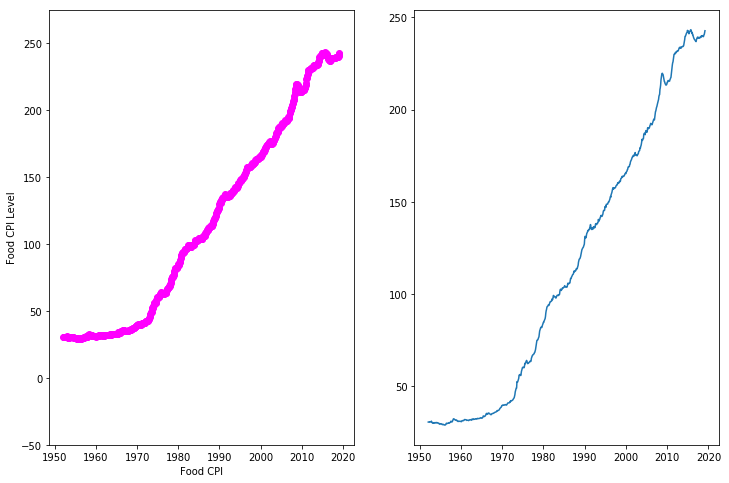

In [39]:
#plot


plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(x=cpidf['date'], 
            y=cpidf['cpi'],
           color="magenta")
plt.ylabel('Food CPI Level')
plt.xlabel('Food CPI')
plt.ylim(-50,275)

plt.subplot(1,2,2)
plt.plot(cpidf['date'], cpidf['cpi'])
plt.show()

#### This plot shows the price level of a set basket of food with one measurement per month over several decades. The inflation rate is the slope. 



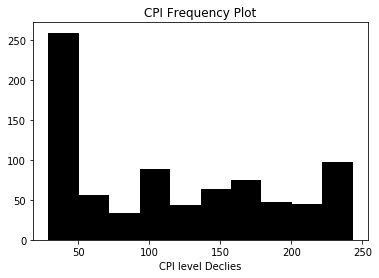

In [4]:
plt.hist(cpidf['cpi'], bins=10, color='black')
plt.title("CPI Frequency Plot")
plt.xlabel('CPI level Declies')
plt.show()

_This is a histogram of the price level measurements._  The different CPI levels are binned into deciles.


In [5]:
cpidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 2 columns):
cpi     807 non-null float64
date    807 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.6 KB


In [6]:
#add a column
cpidf['cpi_rate']=cpidf['cpi'].diff()

#remove Nulls that occured 
cpidf=cpidf.dropna()

cpidf.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 1 to 806
Data columns (total 3 columns):
cpi         806 non-null float64
date        806 non-null datetime64[ns]
cpi_rate    806 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.2 KB


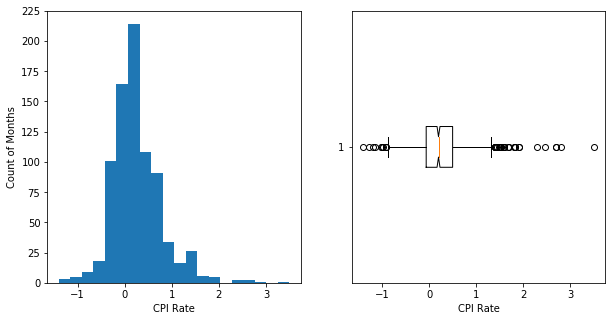

In [25]:
#Histogram & boxplot
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(cpidf['cpi_rate'], bins=20)
plt.xlabel('CPI Rate')
plt.ylabel('Count of Months')

plt.subplot(1,2,2)
plt.boxplot(cpidf['cpi_rate'],
           notch=True,
           vert=False)
plt.xlabel('CPI Rate')
plt.show(fig)



__On the left, this is a histogram of the CPI rates. Rates are mostly distributed around but slightly above 0.
On the right, the same data is plotted as a boxplot.__ 


In [30]:
#make dataframe with decadal data
cpidf['year']=cpidf['date'].dt.year
cpidf.head()



c:\users\chris\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cpi,date,cpi_rate,year
1,30.7,1952-02-01,-0.5,1952
2,30.7,1952-03-01,0.0,1952
3,30.8,1952-04-01,0.1,1952
4,30.8,1952-05-01,0.0,1952
5,30.6,1952-06-01,-0.2,1952


In [33]:
cpi_years_df = cpidf.groupby('year').aggregate(np.mean)
plot_ticks = np.arange(cpi_years_df['cpi'])

plt.bar(cpi_years_df, height=cpi_years_df['cpi'])
plt.xlabel('cpi')
plt.plot

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().